# Energy Based Generative Model -- Maximum Entropy

In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Features: Classifier on MNIST Dataset
example from [keras documentation](https://keras.io/examples/mnist_cnn/)

In [72]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Reshape
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# load mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten input (for maxent search)
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# input shape for conv2d model
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# Normalizing data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255.0
X_test /= 255.0

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
# model.add(Reshape(input_shape))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

X_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.6399 - acc: 0.8407 - val_loss: 0.3643 - val_acc: 0.9029
Epoch 2/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.3502 - acc: 0.9025 - val_loss: 0.3126 - val_acc: 0.9128
Epoch 3/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.3160 - acc: 0.9126 - val_loss: 0.2933 - val_acc: 0.9181
Epoch 4/12
60000/60000 [==============================] - 1s 18us/step - loss: 0.3005 - acc: 0.9164 - val_loss: 0.2868 - val_acc: 0.9208
Epoch 5/12
60000/60000 [==============================] - 1s 19us/step - loss: 0.2916 - acc: 0.9187 - val_loss: 0.2807 - val_acc: 0.9213
Epoch 6/12
60000/60000 [==============================] - 1s 20us/step - loss: 0.2851 - acc: 0.9213 - val_loss: 0.2772 - val_acc: 0.9212
Epoch 7/12
60000/60000 [==============================] - 1s 

In [79]:
model.save('models/mnist_softmax.hdf5')

## Generative Model
- feature function: model softmax prediction
- learn weights

In [73]:
features = model.predict

In [77]:
Xt = X_test[:100]
Xt.shape

(100, 784)

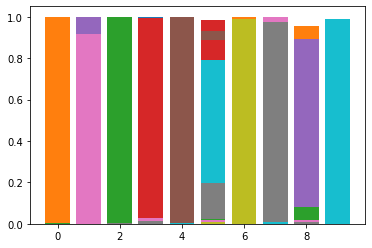

In [78]:
import matplotlib.pyplot as plt
import numpy as np
for f in features(Xt):
    plt.bar(np.arange(10), f)

# plt.bar(np.arange(10), np.random.rand(*Xt[0].shape)[0])


In [18]:
from gempy import MnistGenerator